<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Numpy

http://www.numpy.org/

In [2]:
import numpy as np


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [3]:
ensaios = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]])
ensaios

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [4]:
!pip install pyDOE2
import pyDOE2 as doe

  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-cp37-none-any.whl size=25519 sha256=6adafc9fb35428863b96c83a5aa4665600118c13d1dd6b5fa3a4dc802602b425
  Stored in directory: /root/.cache/pip/wheels/60/88/1d/b334ee00dd83e82d111ec56c3be91573d335c93870698037f1
Successfully built pyDOE2


## Costruindo um planejamento fatorial de 2²


In [5]:
ensaios = doe.ff2n(2)
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [6]:
experimento = pd.DataFrame(ensaios, columns=['Farinha', 'Chocolate'])
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [7]:
experimento['Porcoes'] = [19, 37, 24, 49]
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('seismic_r')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para a farinha

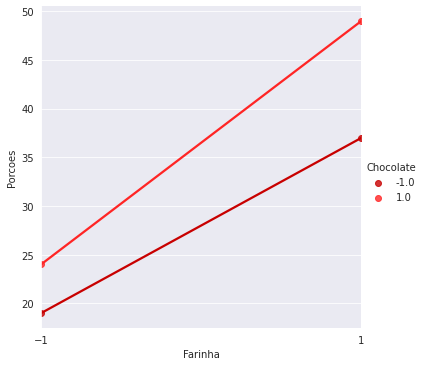

In [10]:
ax = sns.lmplot(data=experimento, x='Farinha', y='Porcoes', ci=None, hue='Chocolate')
ax.set(xticks=(-1,1))
plt.show()

### Para o chocolate

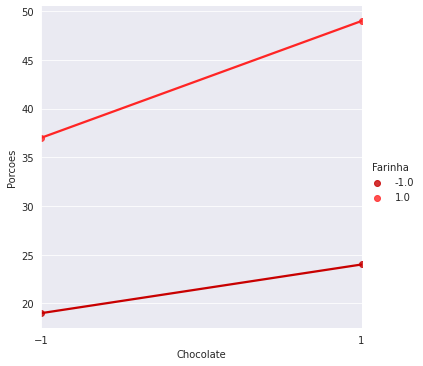

In [11]:
ax = sns.lmplot(data=experimento, x='Chocolate', y='Porcoes', ci=None, hue='Farinha')
ax.set(xticks=(-1,1))
plt.show()

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

### Bibliotecas  Stats Model


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
modelo = smf.ols(data=experimento, formula='Porcoes~Farinha + Chocolate + Farinha:Chocolate')

In [14]:
modelo_ajustado = modelo.fit()

In [15]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                nan
Time:                        10:54:13   Log-Likelihood:                 127.41
No. Observations:                   4   AIC:                            -246.8
Df Residuals:                       0   BIC:                            -249.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        in

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


In [16]:
centro = np.array([[0, 0, 29], [0, 0, 30], [0, 0, 29], [0, 0, 30]])

In [17]:
centro_dataframe = pd.DataFrame(centro, columns=['Farinha', 'Chocolate', 'Porcoes'], index=[4, 5, 6, 7])
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [18]:
experimento = experimento.append(centro_dataframe)
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [19]:
modelo = smf.ols(data=experimento, formula='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [20]:
modelo_ajustado = modelo.fit()

In [21]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Tue, 23 Mar 2021   Prob (F-statistic):            0.00152
Time:                        10:54:13   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





In [23]:
t_valores = modelo_ajustado.tvalues
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [24]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

In [28]:
from scipy import stats

In [29]:
distribuicao = stats.t(df=4)
distribuicao.ppf(q=1-0.025)

2.7764451051977987

In [30]:
limite = [distribuicao.ppf(q=1-0.025)]*len(nome)
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

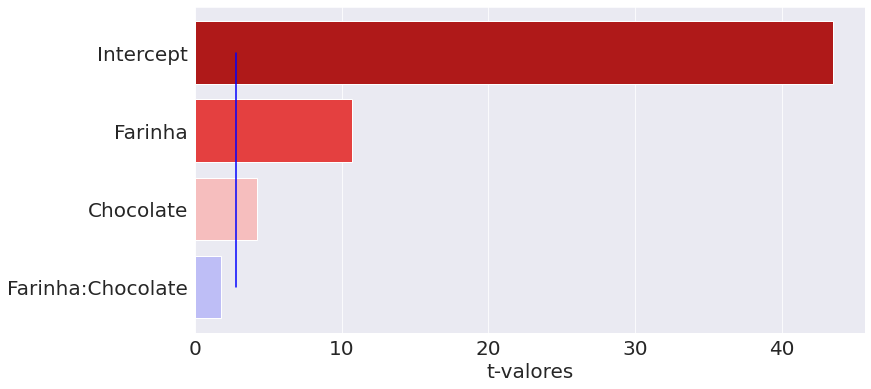

In [34]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(12, 6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)
pareto.plot(limite, nome, 'b')
plt.show()

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [35]:
modelo_2 = smf.ols(data=experimento, formula='Porcoes~Farinha+Chocolate').fit()

In [36]:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           0.000571
Time:                        11:10:59   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [38]:
t_valores = modelo_2.tvalues
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [39]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate']

In [40]:
distribuicao = stats.t(df=5)
limite = [distribuicao.ppf(q=1-0.025)]*len(nome)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

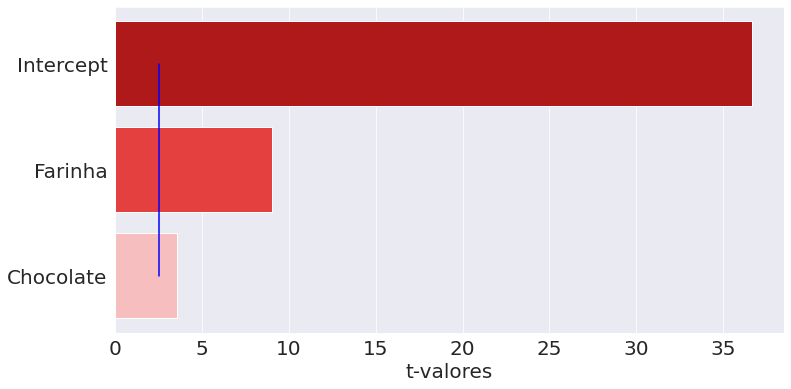

In [41]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(12, 6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)
pareto.plot(limite, nome, 'b')
plt.show()

# <font color = 'purple'> Preditos por observados   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [42]:
observados = experimento['Porcoes']
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

In [43]:
preditos = modelo_2.predict()
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

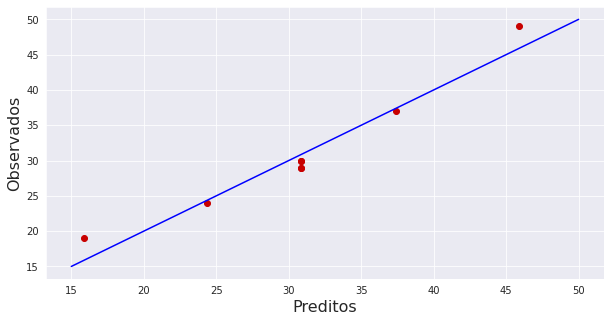

In [46]:
plt.figure(figsize=(10, 5))
plt.xlabel('Preditos', fontsize=16)
plt.ylabel('Observados', fontsize=16)

#linha de guia
x = np.linspace(start=15, stop=50, num=10)
y = np.linspace(start=15, stop=50, num=10)

plt.plot(x, y, 'b')
plt.scatter(preditos, observados)

plt.show()

In [47]:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           0.000571
Time:                        11:28:23   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [48]:
parametros_ajustados = modelo_2.params
parametros_ajustados

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### Definindo a função

In [54]:
def modelo_receita(x_f, x_c):
  limite_normalizado = [-1, +1]
  limite_farinha = [0.5, 1.5]
  limite_chocolate = [0.1, 0.5]

  x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
  x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)

  porcoes = parametros_ajustados['Intercept'] + parametros_ajustados['Farinha']*x_f_convertido + parametros_ajustados['Chocolate']*x_c_convertido
  return round(porcoes)

In [56]:
modelo_receita(0.8, 0.1)

22

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [59]:
x_farinha = np.linspace(start=0.5, stop=1.5, num=10)

In [60]:
x_chocolate = np.linspace(start=0.1, stop=0.5, num=10)

In [61]:
pontos = []

for cont1 in x_farinha:
  temp = []
  for cont2 in x_chocolate:
    temp.append(modelo_receita(cont1, cont2))
  pontos.append(temp)

In [62]:
pontos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### Construindo a superfície de resposta

In [63]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

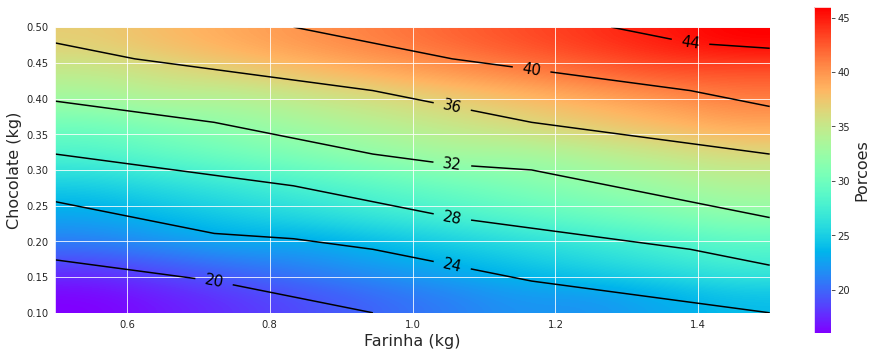

In [70]:
plt.figure(figsize=(16, 6))
plt.xlabel('Farinha (kg)', fontsize=16)
plt.ylabel('Chocolate (kg)', fontsize=16)
mapa_cor = plt.imshow(pontos, cmap=cm.rainbow, interpolation='quadric', extent=(0.5, 1.5, 0.1, 0.5), origin='lower')
plt.colorbar().set_label('Porcoes', fontsize=16)
linhas = plt.contour(x_farinha, x_chocolate, pontos, colors='k', linewidths=1.5)
plt.clabel(linhas, inline=True, fontsize=15.0, inline_spacing=10, fmt='%1.0f')
plt.show()